In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np
import plotly.express as px


df=pd.read_csv('Netflix TV Shows and Movies.csv')
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [35]:
#创建高分电影dataframe
high_rated_movies = df[df['imdb_score' ] >= 7]
high_rated_movies

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5258,5258,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,tt11803618,7.8,339.0
5259,5259,tm1146635,Daiki Tsuneta: Tokyo Chaotic,MOVIE,This documentary follows King Gnu frontman Dai...,2021,NaN,89,tt16781874,7.1,15.0
5263,5263,tm1026043,Just in Time,MOVIE,A meticulous clerk for a bookstore that has ju...,2021,NaN,92,tt14243986,7.0,43.0
5276,5276,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,tt13399802,7.2,45.0


**对评分人数进行描述性统计，由于分布分散且范围极广，所以用log来描述**

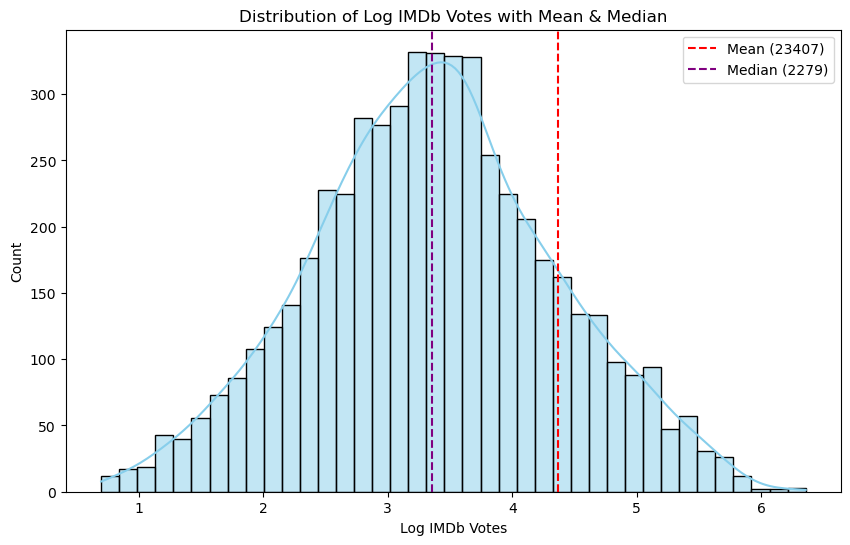

In [37]:
import seaborn as sns
mean_votes = df['imdb_votes'].mean()
median_votes = df['imdb_votes'].median()
# 绘制对数评分人数的分布图
plt.figure(figsize=(10, 6))
sns.histplot(np.log10(df['imdb_votes']), kde=True, color='skyblue', edgecolor='black')

# 标注均值、中位数和标准差范围
plt.axvline(np.log10(mean_votes), color='red', linestyle='--', label=f'Mean ({mean_votes:.0f})')
plt.axvline(np.log10(median_votes), color='purple', linestyle='--', label=f'Median ({median_votes:.0f})')
plt.title('Distribution of Log IMDb Votes with Mean & Median')
plt.xlabel('Log IMDb Votes')
plt.ylabel('Count')
plt.legend()
plt.show()

评分人数的集中分布：大部分电影的评分人数都集中在1,000到100,000的范围。中位数是2279。

（直方图的横坐标是评分人数的对数值（Log IMDb Votes），表示评分人数在不同数量级上的分布，比如从两位数到七位数。
直方图的纵坐标是频率，表示在每个对数区间中（例如1到2之间、2到3之间）有多少部电影。这个频率值显示了该区间内电影的集中程度。）

**这也是对评分人数的描述性统计，反应不同发布时间电影的评分人数变化**

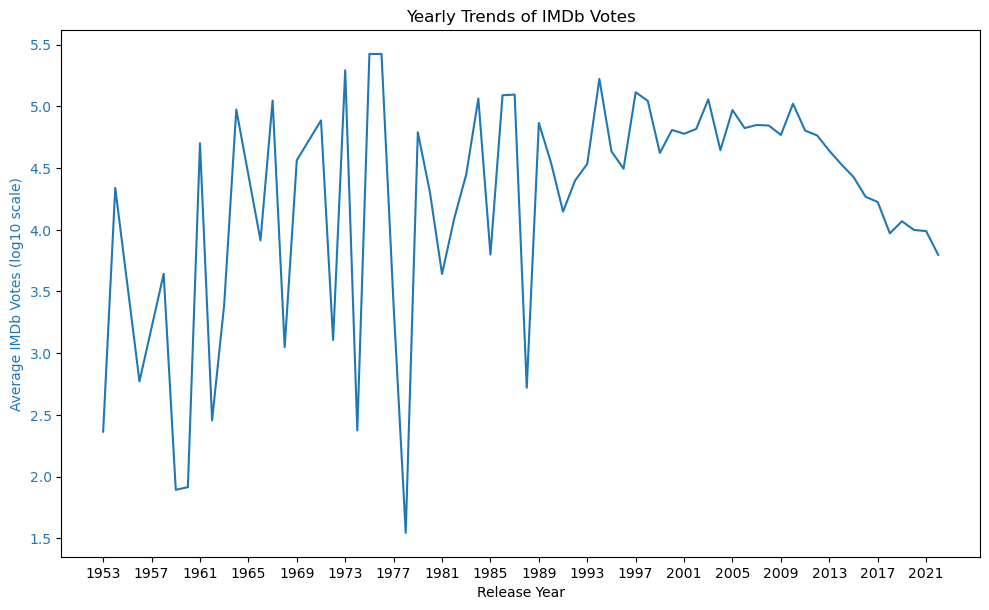

In [73]:
import matplotlib.pyplot as plt

# 确保 'release_year' 列为整数（若该列存在缺失值或为字符串类型需先处理）
df_year=df.copy()
df_year['release_year'] = df_year['release_year'].astype(int)

# 按年份分组计算每年评分人数和评分的均值
yearly_trend = df_year.groupby('release_year').agg({
    'imdb_votes': 'mean', 
    'imdb_score': 'mean'
}).reset_index()

# 绘制评分人数和评分的时间变化趋势
fig, ax1 = plt.subplots(figsize=(10, 6))

# 评分人数的趋势
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average IMDb Votes (log10 scale)', color='tab:blue')
ax1.plot(yearly_trend['release_year'], np.log10(yearly_trend['imdb_votes']), color='tab:blue', label='Avg Votes (log scale)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

years_range = range(yearly_trend['release_year'].min(), yearly_trend['release_year'].max() + 1, 4)
ax1.set_xticks(years_range)

fig.tight_layout()
plt.title('Yearly Trends of IMDb Votes')
plt.show()

**score作为因变量y,观察不同区间内评分人数的score的特征值，比如平均数等，发现这个趋势是逐渐往上移的，所以评分人数和score之间是可能存在关联的**

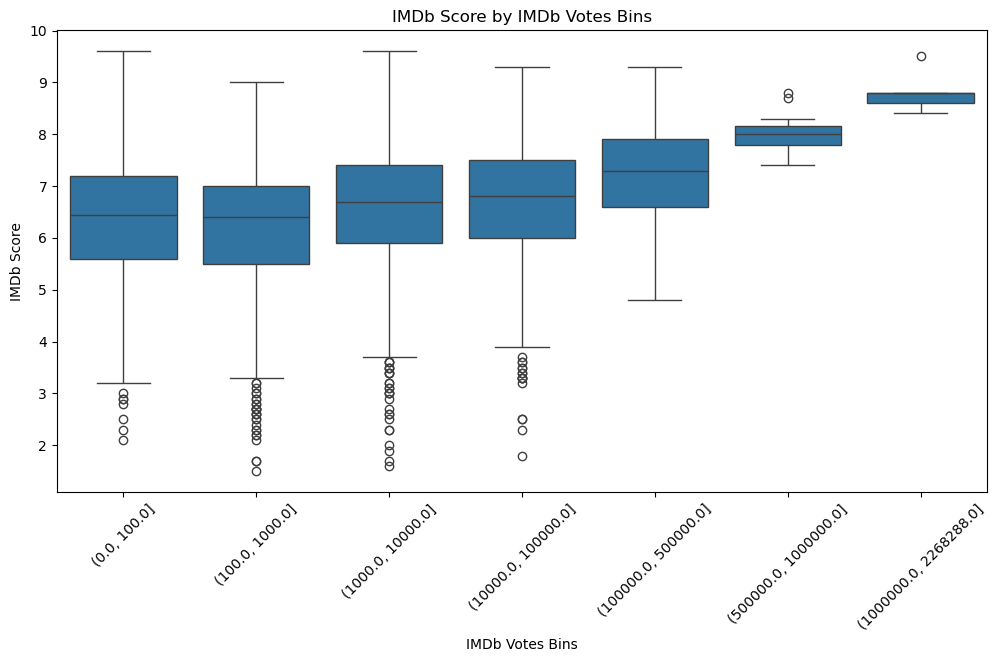

In [39]:
df_boxplot = df.copy()
df_boxplot['imdb_votes_bins'] = pd.cut(df_boxplot['imdb_votes'], bins=[0, 100,1000,10000,100000,500000,1000000,df_boxplot['imdb_votes'].max()])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_boxplot, x='imdb_votes_bins', y='imdb_score')
plt.title('IMDb Score by IMDb Votes Bins')
plt.xlabel('IMDb Votes Bins')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

**vote和score的回归散点图，发现有一定斜率，但是斜率很小，可能有关联，但是关联不大**

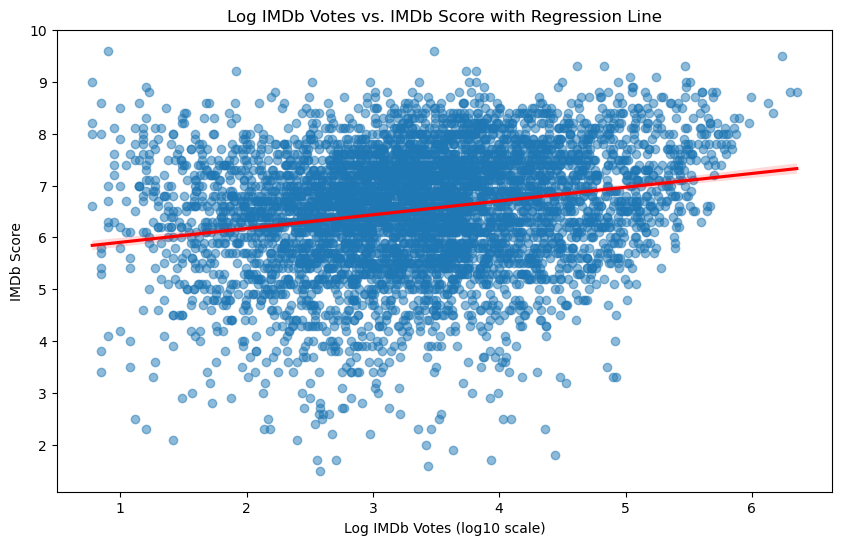

In [43]:
df_regression = df.copy()
df_regression['log_imdb_votes'] = np.log10(df_regression['imdb_votes'] + 1)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_regression, x='log_imdb_votes', y='imdb_score', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Log IMDb Votes vs. IMDb Score with Regression Line')
plt.xlabel('Log IMDb Votes (log10 scale)')
plt.ylabel('IMDb Score')
plt.show()

**另外一种散点图，我不知道需要选择哪一个？这里真的算是有线性关系吗？**

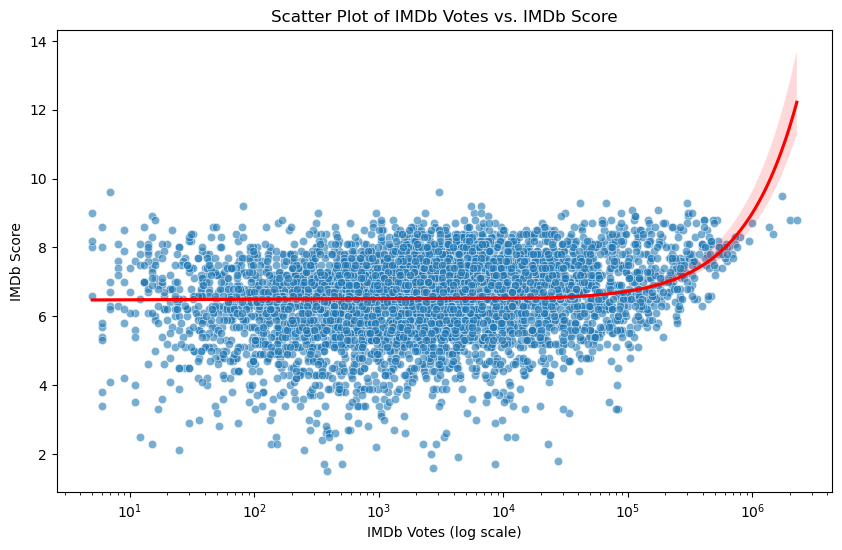

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 绘制原始数据的散点图和回归线
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_votes', y='imdb_score', data=df, alpha=0.6)
sns.regplot(x='imdb_votes', y='imdb_score', data=df, scatter=False, color='red')  # 添加回归线
plt.xscale('log')  # 对评分人数进行对数缩放
plt.xlabel('IMDb Votes (log scale)')
plt.ylabel('IMDb Score')
plt.title('Scatter Plot of IMDb Votes vs. IMDb Score')
plt.show()


**用斯皮尔曼计算相关性，发现虽然相关性很弱（0.181），但由于 p 值显著，可以认为这两者之间的关系并非完全随机，而是存在一定的关联。**

在电影数据中，log_imdb_votes 和 imdb_score 之间的弱正相关可能意味着电影获得的观众投票数量（人气）对评分有一定影响，但评分还受到其他因素的综合作用。

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
df_spearmanr = df.copy()  # 创建副本
df_spearmanr = df_spearmanr.dropna()  # 去除缺失值
df_spearmanr['log_imdb_votes'] = np.log10(df_spearmanr['imdb_votes'] + 1)  # 确保 log10 有效

# 检查变量是否为常数
if df_spearmanr['log_imdb_votes'].nunique() > 1 and df_spearmanr['imdb_score'].nunique() > 1:
    # 计算斯皮尔曼相关性
    correlation, p_value = spearmanr(df_spearmanr['log_imdb_votes'], df_spearmanr['imdb_score'])
    print(f"Spearman correlation: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
else:
    print("One or both variables are constant; Spearman correlation cannot be computed.")

Spearman correlation: 0.181
P-value: 0.000


不同时期，score和vote的关系是否发生变化，结果发现没有

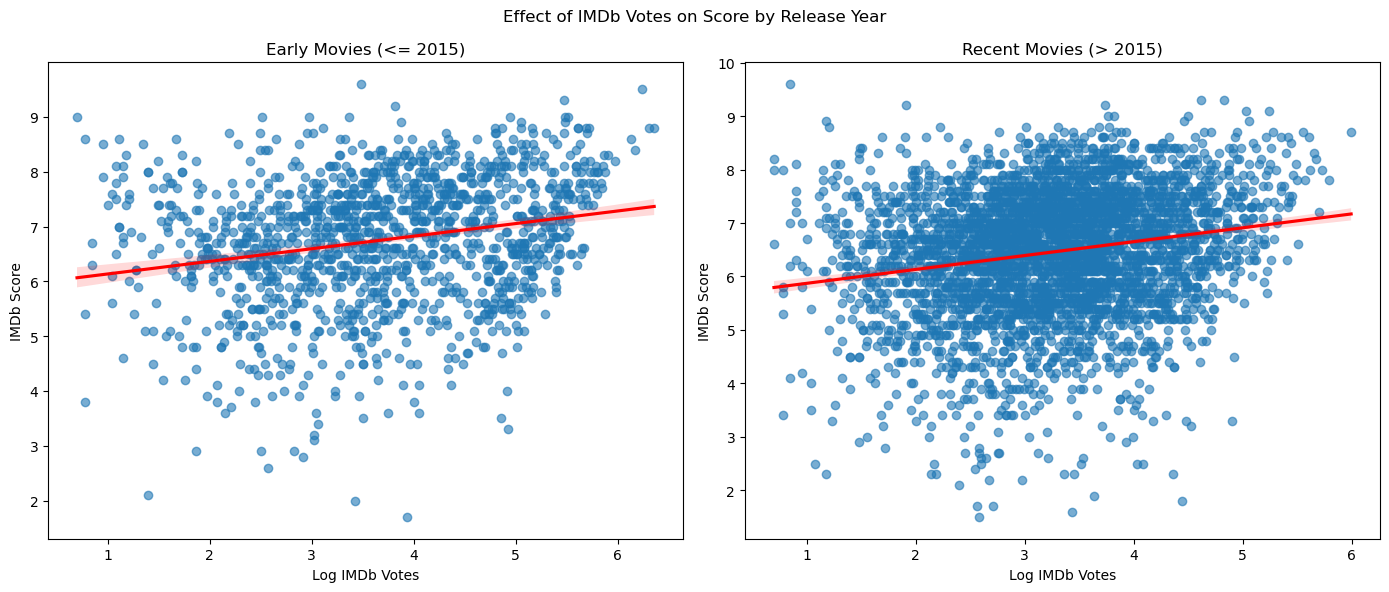

In [25]:
a=df['release_year'].mean()
# 创建早期和近期的时间窗口，例如早期(2015年及以前)和近期(2015年以后)
early_df = df[df['release_year'] <= a]
recent_df = df[df['release_year'] > a]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 早期电影的散点图和回归直线
sns.regplot(x=np.log10(early_df['imdb_votes']), y=early_df['imdb_score'], 
            ax=axes[0], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[0].set_title('Early Movies (<= 2015)')
axes[0].set_xlabel('Log IMDb Votes')
axes[0].set_ylabel('IMDb Score')

# 近期电影的散点图和回归直线
sns.regplot(x=np.log10(recent_df['imdb_votes']), y=recent_df['imdb_score'], 
            ax=axes[1], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[1].set_title('Recent Movies (> 2015)')
axes[1].set_xlabel('Log IMDb Votes')
axes[1].set_ylabel('IMDb Score')

plt.suptitle('Effect of IMDb Votes on Score by Release Year')
plt.tight_layout()
plt.show()

**高评分的投票人数特征**

发现还是高评分电影的打分人数还是围绕在1000-10000之间

C:\Users\Fan\AppData\Local\Temp\ipykernel_17324\3585243170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_movies['log_imdb_votes'] = np.log10(high_rated_movies['imdb_votes'] + 1)


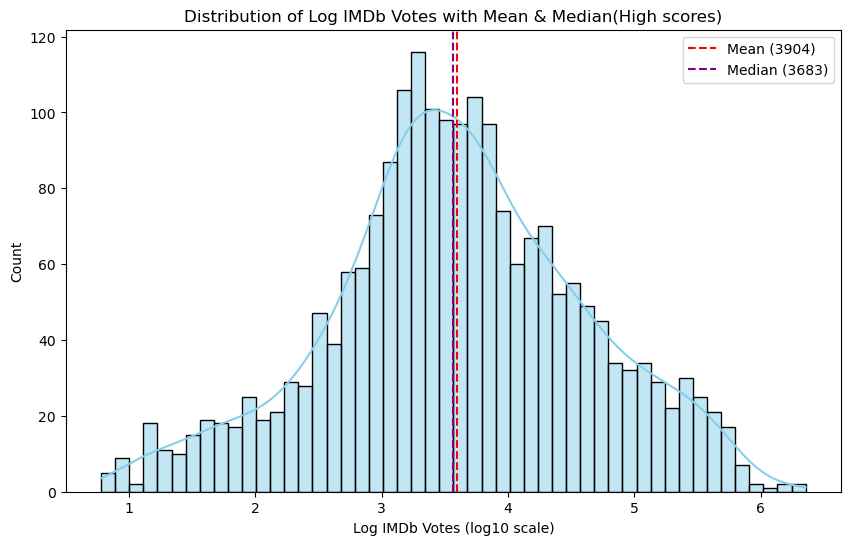

In [95]:
high_rated_movies['log_imdb_votes'] = np.log10(high_rated_movies['imdb_votes'] + 1)

# 计算对数变换后投票人数的均值和中位数
mean_votes1 = high_rated_movies['log_imdb_votes'].mean()
median_votes1 = high_rated_movies['log_imdb_votes'].median()

# 绘制对数评分人数的分布图
plt.figure(figsize=(10, 6))
sns.histplot(high_rated_movies['log_imdb_votes'], bins=50, kde=True, color='skyblue', edgecolor='black')

# 标注均值和中位数
plt.axvline(mean_votes1, color='red', linestyle='--', label=f'Mean ({10**mean_votes1-1:.0f})')  # 将对数变换后的均值转回原始值显示
plt.axvline(median_votes1, color='purple', linestyle='--', label=f'Median ({10**median_votes1-1:.0f})')  # 同理

# 图表标题和标签
plt.title('Distribution of Log IMDb Votes with Mean & Median(High scores)')
plt.xlabel('Log IMDb Votes (log10 scale)')
plt.ylabel('Count')
plt.legend()

# 显示图表
plt.show()

**这张图清晰地展示了两类高评分电影（高投票 vs. 低投票）在投票数和评分上的分布特点。**

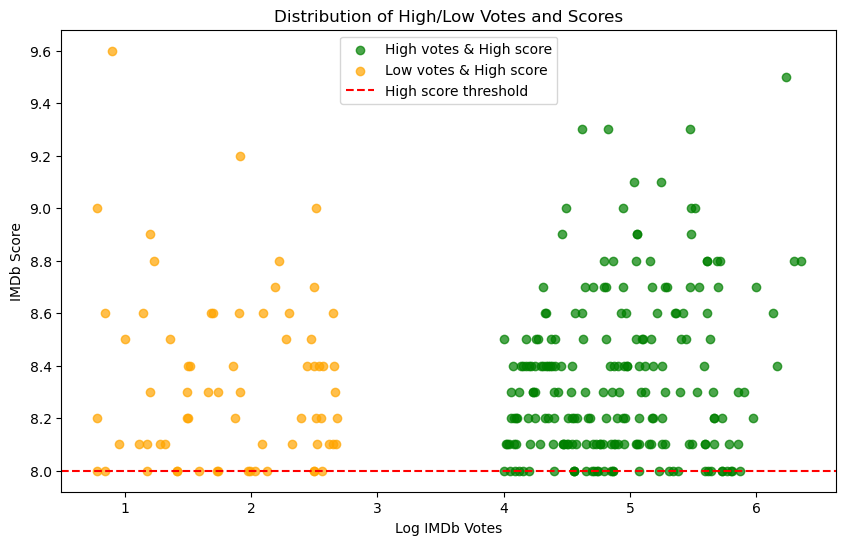

In [58]:
df_new = df.copy()
df_new['log_votes'] = np.log10(df_new['imdb_votes'] + 1)
votes_threshold_high = df_new['imdb_votes'].quantile(0.75)  # 上四分位数
votes_threshold_low = df_new['imdb_votes'].quantile(0.25)   # 下四分位数
score_threshold_high = 8  
# 高投票高评分
high_votes_high_score = df_new[(df_new['imdb_votes'] >= votes_threshold_high) & 
                           (df_new['imdb_score'] >= score_threshold_high)]

# 小众高分
low_votes_high_score = df_new[(df_new['imdb_votes'] <= votes_threshold_low) & 
                          (df_new['imdb_score'] >= score_threshold_high)]

# 改进可视化
plt.figure(figsize=(10, 6))
plt.scatter(high_votes_high_score['log_votes'], high_votes_high_score['imdb_score'], 
            label='High votes & High score', alpha=0.7, color='green')
plt.scatter(low_votes_high_score['log_votes'], low_votes_high_score['imdb_score'], 
            label='Low votes & High score', alpha=0.7, color='orange')
plt.axhline(score_threshold_high, color='red', linestyle='--', label='High score threshold')
plt.xlabel('Log IMDb Votes')
plt.ylabel('IMDb Score')
plt.legend()
plt.title('Distribution of High/Low Votes and Scores')
plt.show()

绿色点代表主流电影：这些电影通常为观众广泛关注、讨论甚至争议的主流作品。

橙色点代表小众佳作：它们可能因宣传不足、定位特定受众群体或独特的艺术风格导致投票少，但仍然被一小部分观众高度评价。

高投票电影的评分多样性： 评价人群的多样化导致评分范围扩大。

小众电影的观众忠诚度： 橙色点的集中性表明，这些电影的观众可能更倾向于对其表达高度满意。

评分与投票无绝对关联： 低投票的电影仍然可能具有较高评分，表明评分不完全依赖于投票数。

9分以上稀缺性： 无论高投票还是低投票，评分超过9分的电影都较少，说明9分以上的作品通常需要更高的质量和观众共鸣才能达到。

**高评分电影的时间趋势分析**

目标：观察不同年代的高评分电影是否在评分人数上存在显著差异，尤其是在互联网普及后评分人数是否显著增多。

结果发现没有

C:\Users\Fan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


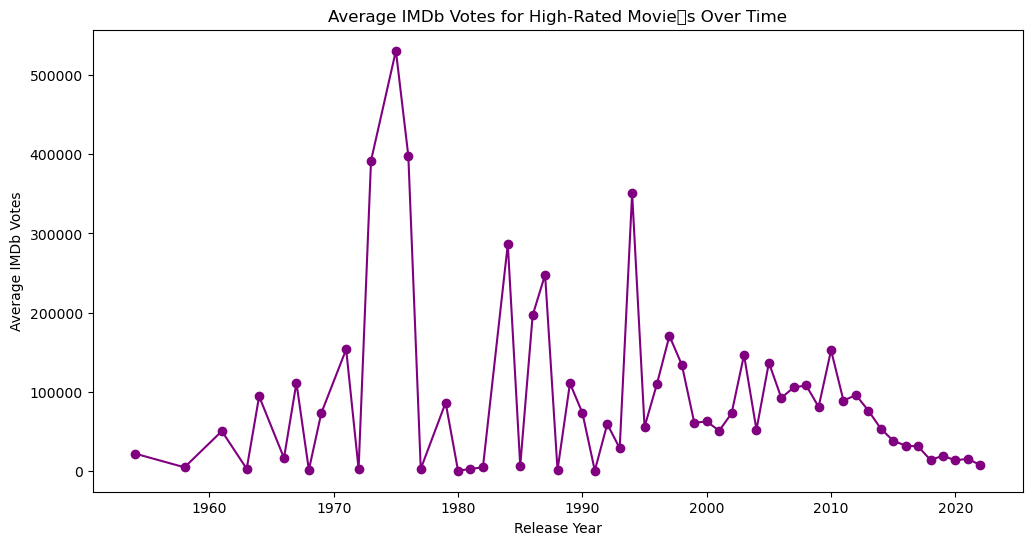

In [87]:
high_score_df = df[df['imdb_score'] >= 7]
year_stats = high_score_df.groupby('release_year')['imdb_votes'].mean()

# 绘制时间趋势图
plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats.values, marker='o', color='purple')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Votes')
plt.title('Average IMDb Votes for High-Rated Movie有s Over Time')
plt.show()

**高评分电影的评分人数与口碑的相关性**

目标：探讨评分人数是否与用户的口碑传播（即评分和评价的正面性）有显著关联。

分析方法：
可以进一步筛选评分和评分人数都在高位的电影，分析其是否具备一致的标签和关键词。

C:\Users\Fan\AppData\Local\Temp\ipykernel_17324\901840308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_score_df['sentiment'] = high_score_df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)


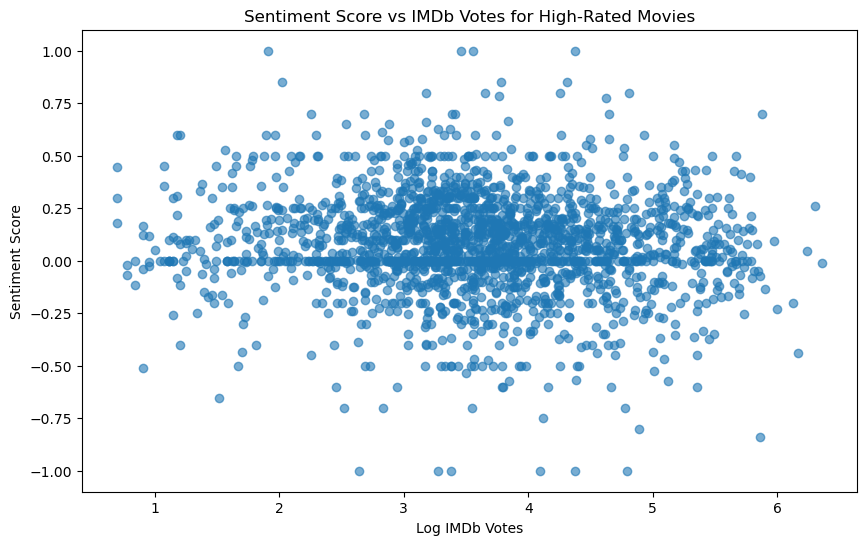

In [89]:
#!pip install textblob
from textblob import TextBlob

high_score_df['sentiment'] = high_score_df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 绘制评分人数与情感得分的散点图
plt.figure(figsize=(10, 6))
plt.scatter(np.log10(high_score_df['imdb_votes']), high_score_df['sentiment'], alpha=0.6)
plt.xlabel('Log IMDb Votes')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs IMDb Votes for High-Rated Movies')
plt.show()

**聚类分析**：高评分高评分人数的电影可能属于“经典热门”集群，而评分高但评分人数少的电影可能属于“冷门佳作”集群。

count    2058.000000
mean        3.589968
std         1.020167
min         0.698970
25%         2.993546
50%         3.566260
75%         4.251887
max         6.355698
Name: log_imdb_votes, dtype: float64


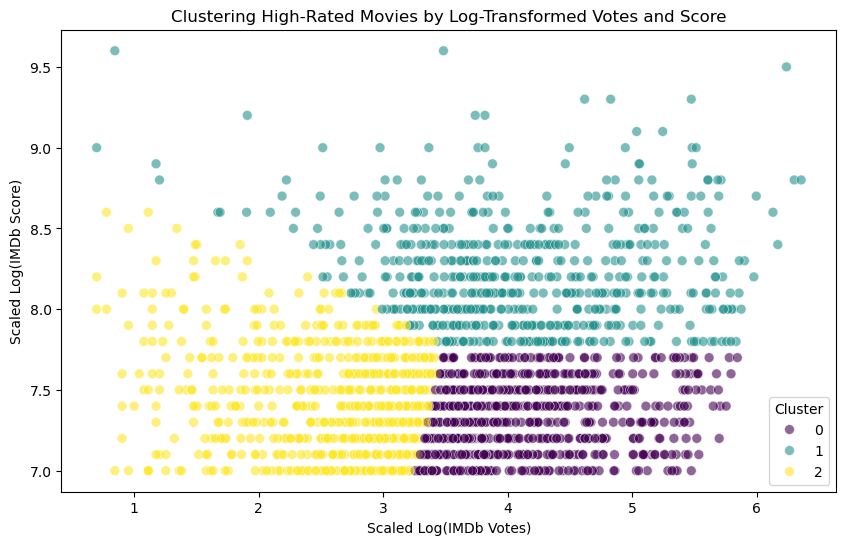

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
high_score_df1 = high_score_df.copy()
high_score_df1 = high_score_df1.dropna(subset=['imdb_votes', 'imdb_score'])

# Step 2: 对评分人数 (imdb_votes) 进行对数变换
high_score_df1['log_imdb_votes'] = np.log10(high_score_df1['imdb_votes'])  # 创建新的列 log_imdb_votes

# Step 3: 检查变换后的列范围，确保在合理区间内（例如1-6左右）
print(high_score_df1['log_imdb_votes'].describe())  # 可选，用于调试

# Step 4: 提取聚类所需的特征列，并进行标准化
X = high_score_df1[['log_imdb_votes', 'imdb_score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 标准化特征

# Step 5: 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=3, random_state=0)  # 假设使用3个聚类
high_score_df1['Cluster'] = kmeans.fit_predict(X_scaled)  # 将聚类结果添加到数据框中

# Step 6: 绘制聚类结果的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_score_df1,
    x='log_imdb_votes', 
    y='imdb_score', 
    hue='Cluster', 
    palette='viridis', 
    alpha=0.6,
    s=50
)
plt.xlabel('Scaled Log(IMDb Votes)')
plt.ylabel('Scaled Log(IMDb Score)')
plt.title('Clustering High-Rated Movies by Log-Transformed Votes and Score')
plt.legend(title='Cluster', loc='best')
plt.show()